# Exercise 1 – Random Search and Rosenbrock Banana function 

### Importing Libraries 

In [1]:
import numpy as np # numpy allows us to execute mathematical operations and work with arrays

import matplotlib.pyplot as plt # Import matplotlib to enable plotting data

### 1.1 – Creating a random search algorithm 

In [1]:
# random search function
def random_search(g,alpha_choice,max_its,w,num_samples):
    '''

    random_search is a zero-order optimization function that starts at some point and looks locally for a minimum of some function. 
    The algorithm generates a number of random directions that are then normalized to create candidate directions.
    The candidate directions are then scaled by alpha and added to the current point to generate step candidates.
    Step candidates are evaluated in the function and the step that produces the smallest value is chosen and stored for the next iteration. 
    The algorithm is repeated a number of times determined by the assigned maximum iterations. 


    Parameters
    -------------

    g : callable 
    cost function

    alpha_choice : int or str
    learning rate

    max_its : int
    maximum number of iterations

    w : array 
    starting vector

    num_samples : int
    number of random directions

    Return
    -------------

    w_history : list
    contains all the steps taken in the algorithm including the starting point

    cost_history : list
    contains the evaluated cost function at the kth step including the starting value

    '''
    w_history = [w]         # container for w history containing initial point
    cost_history = [g(w)]           # container for corresponding cost function containing initial cost
    alpha = 0
    
    for k in range(1,max_its+1):
        if alpha_choice == 'diminishing': # check if diminishing steplength rule used
            alpha = 1/float(k) # step size becomes smaller for every step
        else:
            alpha = alpha_choice # step size remains the same 
            
        P_directions = np.random.randn(num_samples,len(w)) # generate a number of random direction vectors determined by num_samples with len(w) dimensions
        norm_directions = np.array([i/np.linalg.norm(i) for i in P_directions]) # create an array consisting of the unit vectors of P_directions
        
        w_candidates = w + alpha*norm_directions # generate possible points using the unit vectors scaled by our learning rate   
        cost_candidates = np.array([g(w_vals) for w_vals in w_candidates]) # produces cost function ouputs from w_candidates
        min_dir = np.argmin(cost_candidates) # find index with minimum point among w candidates
        
        if g(w_candidates[min_dir]) < (g(w)): # check if current evaluation is smaller than previous cost
            w = w_candidates[min_dir] # update new starting vector 
        w_history.append(w) # keep track of our points
        cost_history.append(g(w)) # keep track of our cost function
        
    return w_history,cost_history

### 1.2 – Testing random search with alpha = 1

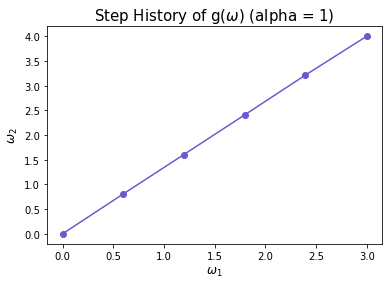

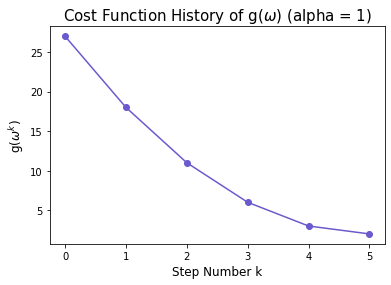

In [3]:
# Set the parameters for our algorithm 
g = lambda w: np.dot(w.T,w) + 2
alpha_choice = 1; w = np.array([3,4]); num_samples = 1000; max_its = 5;


# Run our algorithm with the defined function to obtain w and cost history 
w_history,cost_history = random_search(g,alpha_choice,max_its,w,num_samples)


# Plotting step history
w_history_array = np.array(w_history) # convert w_history into an array to allow plotting

plt.title("Step History of g($\omega$) (alpha = 1)", fontsize = 15) # set title of plot to step history with specified alpha

plt.xlabel('$\omega_1$', fontsize = 12) # set x-axis title to w1 of g(w1,w2)

plt.ylabel('$\omega_2$', fontsize = 12) # set y-axis title to w2 of g(w1,w2)

plt.plot(w_history_array[:,:1],w_history_array[:,1:], color = 'slateblue', marker = 'o') # set the x and y values, color of plot, and marker shape

plt.show()


# Plotting cost history
step_numbers = np.arange(0, len(cost_history)) # create an array that is a range from 0 to the number of steps taken

plt.title("Cost Function History of g($\omega$) (alpha = 1)", fontsize = 15) # set title of plot to cost history at kth step with specified alpha

plt.xlabel('Step Number k', fontsize = 12) # set x-axis title to the kth step in the algorithm

plt.ylabel('g($\omega^k$)', fontsize = 12) # set y-axis title to the value of the cost function at the kth step

plt.plot(step_numbers, cost_history, color = 'slateblue', marker = 'o') # set the x and y axis values, color of plot, and shape of marker

plt.show()

### 1.3 – Testing random search with alpha = 0.3

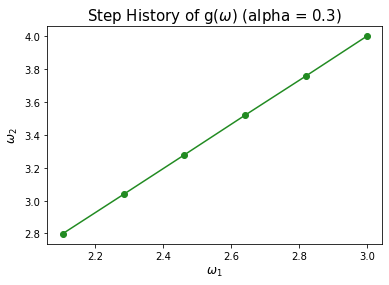

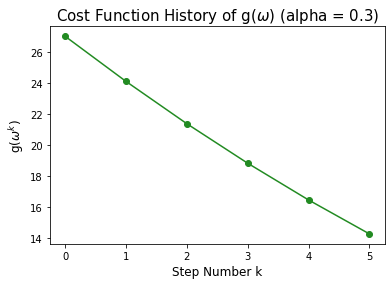

In [4]:
# Set the parameters for our algorithm 
g = lambda w: np.dot(w.T,w) + 2
alpha_choice = 0.3; w = np.array([3,4]); num_samples = 1000; max_its = 5;


# Run our algorithm with the defined function to obtain w and cost history
w2_history,cost2_history = random_search(g,alpha_choice,max_its,w,num_samples)


# Plot step history
w2_history_array = np.array(w2_history) 

plt.title("Step History of g($\omega$) (alpha = 0.3)", fontsize = 15) 

plt.xlabel('$\omega_1$', fontsize = 12) 

plt.ylabel('$\omega_2$', fontsize = 12) 

plt.plot(w2_history_array[:,:1],w2_history_array[:,1:], color = 'forestgreen', marker = 'o') 

plt.show()


# Plot cost history
step_numbers2 = np.arange(0, len(cost2_history)) 

plt.title("Cost Function History of g($\omega$) (alpha = 0.3)", fontsize = 15) 

plt.xlabel('Step Number k', fontsize = 12)

plt.ylabel('g($\omega^k$)', fontsize = 12) 

plt.plot(step_numbers2, cost2_history, color = 'forestgreen', marker = 'o')

plt.show()

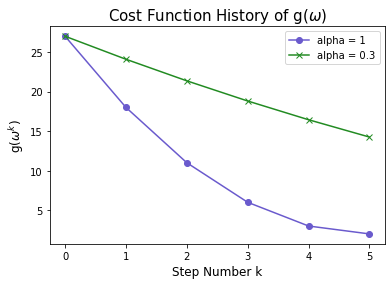

In [5]:
# Plot cost history for both alpha = 1 and alpha = 0.3 

plt.title("Cost Function History of g($\omega$)", fontsize = 15) 

plt.xlabel('Step Number k', fontsize = 12)

plt.ylabel('g($\omega^k$)', fontsize = 12) 

plt.plot(step_numbers, cost_history, color = 'slateblue', marker = 'o', label = 'alpha = 1') 

plt.plot(step_numbers2, cost2_history, color = 'forestgreen', marker = 'x', label = 'alpha = 0.3') 

plt.legend(loc = 'upper right') # provide legend in the upper right quadrant to distinguish between the plots based on color and marker shape

plt.show()

#### Do the results improve when we lower the alpha to 0.3?

When we compare the cost function history using the parameters of alpha = 1 and alpha = 0.3, we can see there is a large difference in the rate of change of g(w) and the final value of g(w) after 5 steps (k = 5). Setting alpha = 0.3 did not improve the results as the rate of change of g(w) decreased and cost function did not reach the minimum value of g(w) = 2 (alpha = 1 reached minimum whereas alpha = 0.3 did not). We can see that at alpha = 1 (blue line), the minimum can be achieved due to a more rapid minimization that converges to g(wk) = 2.   

### 1.4 – Testing random search on Rosenbrock Banana function

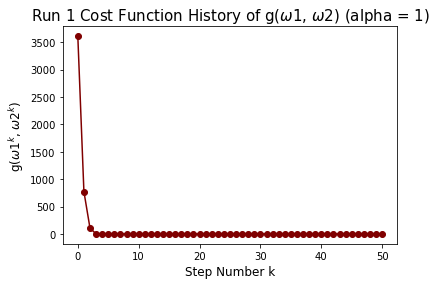

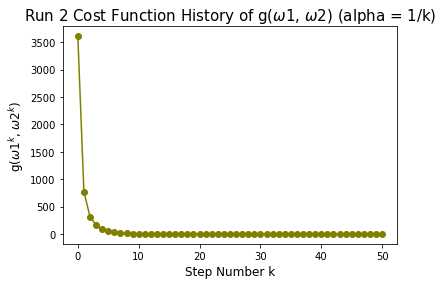

In [6]:
'Run 1'

# Set parameters for our algorithm 
g = lambda w : 100*((w[1]-w[0]**2)**2)+(w[0]-1)**2
alpha_choice = 1; w = np.array([-2,-2]); num_samples = 1000; max_its = 50;


# Run our algorithm with the defined function to obtain w and cost history
w_history_r1,cost_history_r1 = random_search(g,alpha_choice,max_its,w,num_samples)


# Plot cost function history
step_numbers_r1 = np.arange(0, len(cost_history_r1)) 

plt.title("Run 1 Cost Function History of g($\omega1$, $\omega2$) (alpha = 1)", fontsize = 15) # set title of plot to cost history at kth step with specified alpha

plt.xlabel('Step Number k', fontsize = 12) # set x-axis title to the kth step in the algorithm

plt.ylabel('g($\omega1^k$, $\omega2^k$)', fontsize = 12) # set y-axis title to the value of the cost function at the kth step

plt.plot(step_numbers_r1, cost_history_r1, color = 'maroon', marker = 'o') # set the x and y axis values, color of plot, and shape of marker

plt.show()



'Run 2'

# Set parameters for our algorithm
g = lambda w : 100*((w[1]-w[0]**2)**2)+(w[0]-1)**2
alpha_choice = 'diminishing'; w = np.array([-2,-2]); num_samples = 1000; max_its = 50;


# Run our algorithm with the defined function to obtain w and cost history
w_history_r2,cost_history_r2 = random_search(g,alpha_choice,max_its,w,num_samples)


# Plot cost function history
step_numbers_r2 = np.arange(0, len(cost_history_r2)) # create an array that is a range from 0 to the number of steps taken in run 1 

plt.title("Run 2 Cost Function History of g($\omega1$, $\omega2$) (alpha = 1/k)", fontsize = 15) # set title of plot to cost history at kth step with specified alpha

plt.xlabel('Step Number k', fontsize = 12) # set x-axis title to the kth step in the algorithm

plt.ylabel('g($\omega1^k$, $\omega2^k$)', fontsize = 12) # set y-axis title to the value of the cost function at the kth step

plt.plot(step_numbers_r2, cost_history_r2, color = 'olive', marker = 'o') # set the x and y axis values, color of plot, and shape of marker

plt.show()

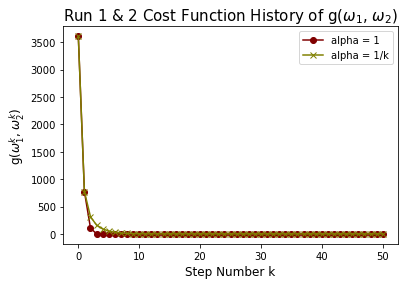

In [7]:
# Run 1 & Run 2 Cost Function History Overlap 

step_numbers_r1 = np.arange(0, len(cost_history_r1))

step_numbers_r2 = np.arange(0, len(cost_history_r2))  

plt.title("Run 1 & 2 Cost Function History of g($\omega_{1}$, $\omega_{2}$)", fontsize = 15) # set title of plot to cost history at kth step 

plt.xlabel('Step Number k', fontsize = 12) # set x-axis title to the kth step in the algorithm

plt.ylabel('g($\omega_{1}^k$, $\omega_{2}^k$)', fontsize = 12) # set y-axis title to the value of the cost function at the kth step

plt.plot(step_numbers_r1, cost_history_r1, color = 'maroon', marker = 'o', label = 'alpha = 1') 

plt.plot(step_numbers_r2, cost_history_r2, color = 'olive', marker = 'x', label = 'alpha = 1/k')

plt.legend()

plt.show()

#### How do the two runs compare?

When comparing the cost function history of run 1 and run 2 we can see that run 1 (alpha = 1) reaches minimum faster than run 2 (alpha = 1/k). This is demonstrated by the fact that the points in run 1 plot reach minimum at around 3 points whereas run 2 reaches minimum at around 6-8 points. Moreover, both runs reaches the same minimum value of around g(w1,w2) = 0, therefore the only difference between the two is the rate of minimization (run 1 is more rapid).

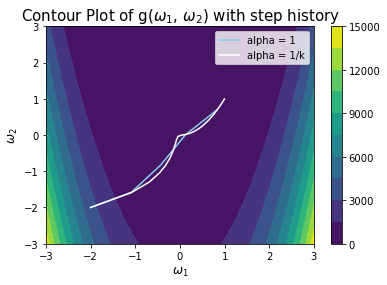

In [8]:
# Introduce our data
def g(w1,w2):
    return (100*((w2-(w1**2))**2))+((w1-1)**2)
x1 = np.linspace(-3,3,100) # x-axis from -3 to 3 that are 100 points apart
y1 = np.linspace(-3,3,100) # y-axis from -3 to 3 that are 100 points apart 
x2,y2 = np.meshgrid(x1,y1) # Creates a rectangular grid functioning as a cartesian plane
z = g(x2,y2)

# Create arrays for w history of run 1 & run 2
w_history_array_r1 = np.array(w_history_r1) 
w_history_array_r2 = np.array(w_history_r2)

# Create the contour plot of g(w1,w2)
plt.contourf(x2,y2,z,10)
plt.colorbar(plt.contourf(x2,y2,z,10))

# Overlay w_history of run 1 & run 2 on contour plot
plt.plot(w_history_array_r1[:,:1],w_history_array_r1[:,1:], color = 'skyblue', label = 'alpha = 1')
plt.plot(w_history_array_r2[:,:1],w_history_array_r2[:,1:], color = 'white', label = 'alpha = 1/k')

# Add the title and axis titles
plt.title("Contour Plot of g($\omega_{1}$, $\omega_{2}$) with step history", fontsize = 15) 
plt.xlabel('$\omega_1$', fontsize = 12) 
plt.ylabel('$\omega_2$', fontsize = 12)

plt.legend()

plt.show()

#### Interpretation from the contour plot overlayed with w_history 

Both runs (alpha = 1 and alpha = 1/k) were able to take steps and reach the darkest area of the contour plot indicating a minimized value compared to neighbouring regions. Based on the fact that the function has a minimum of w1,w2 = (1,1) then we can be quite confident that the two runs were able to reach the global minimum based on the contour plot above. 

### 1.5 – Testing random search on six-hump camel function

In [9]:
# Run 1 (alpha = 1)

# Set the parameters for our algorithm 
g = lambda w: (4-2.1*w[0]**2 + (w[0]**4)*(1/3))*w[0]**2 + w[0]*w[1] + ((-4+4*w[1]**2)*(w[1]**2))
alpha_choice = 1; w = np.array([2,2]); num_samples = 1000; max_its = 50; w2 = np.array([0,0])

# Run our algorithm with the defined function to obtain w and cost history
w_history_alp,cost_history_alp = random_search(g,alpha_choice,max_its,w,num_samples)
w_history_alp2,cost_history_alp2 = random_search(g,alpha_choice,max_its,w2,num_samples)

In [10]:
# Run 2 (alpha = 1/k)

# Set the parameters for our algorithm 
g = lambda w: (4-2.1*w[0]**2 + (w[0]**4)*(1/3))*w[0]**2 + w[0]*w[1] + ((-4+4*w[1]**2)*(w[1]**2))
alpha_choice = 'diminishing'; w = np.array([2,2]); num_samples = 1000; max_its = 50; w2 = np.array([0,0])

# Run our algorithm with the defined function to obtain w and cost history
w_history_dim,cost_history_dim = random_search(g,alpha_choice,max_its,w,num_samples)
w_history_dim2,cost_history_dim2 = random_search(g,alpha_choice,max_its,w2,num_samples)

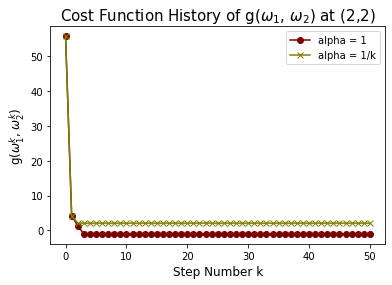

In [11]:
# Run 1 and Run 2 Cost History Plot Overlap at (2,2)

step_numbers_alp = np.arange(0, len(cost_history_alp))

step_numbers_dim = np.arange(0, len(cost_history_dim))

plt.title("Cost Function History of g($\omega_{1}$, $\omega_{2}$) at (2,2)", fontsize = 15) 

plt.xlabel('Step Number k', fontsize = 12) 

plt.ylabel('g($\omega_{1}^k$, $\omega_{2}^k$)', fontsize = 12) 

plt.plot(step_numbers_alp, cost_history_alp, color = 'maroon', marker = 'o', label = 'alpha = 1') 

plt.plot(step_numbers_dim, cost_history_dim, color = 'olive', marker = 'x', label = 'alpha = 1/k')

plt.legend()

plt.show()

#### Comparison between run 1 and run 2

Based on the above, it seems that run 2 (alpha = 1/k) has reaches a minimum that is larger in value than run 1 (alpha = 1) indicating that run 1 has a greater optimization. This can be demonstrated by the fact that the cost function plot of run 1 reaches a steady point where g(w1,w2) < 0, whereas in run 2 g(w1,w2) >= 0.

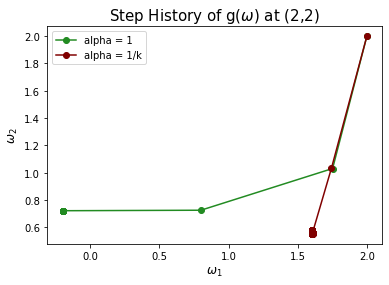

In [12]:
# w_history of run 1 & run 2 at (2,2)
w_history_array_alp = np.array(w_history_alp) 

w_history_array_dim = np.array(w_history_dim)

plt.title("Step History of g($\omega$) at (2,2)", fontsize = 15) 

plt.xlabel('$\omega_1$', fontsize = 12) 

plt.ylabel('$\omega_2$', fontsize = 12) 

plt.plot(w_history_array_alp[:,:1],w_history_array_alp[:,1:], color = 'forestgreen', marker = 'o', label = 'alpha = 1') 

plt.plot(w_history_array_dim[:,:1],w_history_array_dim[:,1:], color = 'maroon', marker = 'o', label = 'alpha = 1/k')

plt.legend()

plt.show()

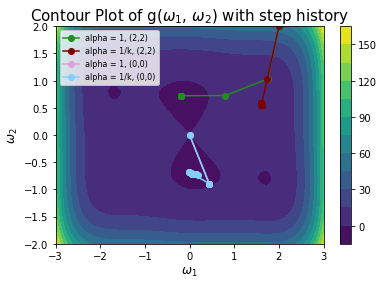

In [13]:
# Introduce our data
def g(w1,w2):
    return (4-2.1*w1**2 + (w1**4)*(1/3))*w1**2 + w1*w2 + ((-4+4*w2**2)*(w2**2))
x1 = np.linspace(-3,3,100)
y1 = np.linspace(-2,2,100)
x2,y2 = np.meshgrid(x1,y1)
z = g(x2,y2)

# Create arrays for w history of run 1 & run 2
w_history_array_alp = np.array(w_history_alp) 
w_history_array_dim = np.array(w_history_dim)
w_history_array_alp2 = np.array(w_history_alp2) 
w_history_array_dim2 = np.array(w_history_dim2)

# Create the contour plot of g(w1,w2)
plt.contourf(x2,y2,z,10)
plt.colorbar(plt.contourf(x2,y2,z,10))

# Overlay w_history of run 1 & run 2 on contour plot
plt.plot(w_history_array_alp[:,:1],w_history_array_alp[:,1:], color = 'forestgreen', marker = 'o', label = 'alpha = 1, (2,2)')
plt.plot(w_history_array_dim[:,:1],w_history_array_dim[:,1:], color = 'maroon', marker = 'o', label = 'alpha = 1/k, (2,2)')
plt.plot(w_history_array_alp2[:,:1],w_history_array_alp2[:,1:], color = 'plum', marker = 'o', label = 'alpha = 1, (0,0)')
plt.plot(w_history_array_dim2[:,:1],w_history_array_dim2[:,1:], color = 'lightskyblue', marker = 'o', label = 'alpha = 1/k, (0,0)')

# Create figure and axis titles
plt.title("Contour Plot of g($\omega_{1}$, $\omega_{2}$) with step history", fontsize = 15) 
plt.xlabel('$\omega_1$', fontsize = 12) 
plt.ylabel('$\omega_2$', fontsize = 12)

plt.legend(fontsize = 8)

plt.show()

#### Interpretation of the contour plot

Based on the contour plot above overlayed with w_history, it seems that alpha = 1 for w = (2,2) has reached a global minimum (as the final green point has reached the area that is the darkest colour which showcases that it is in the lowest range of the cost function). On the other hand, alpha = 1/k for w = (2,2) has reached a local minimum as it got stuck at a spot that is not a global minimum. If the starting point was changed at some point closer to both global minimum (such as (0,0)) then it seems that both alpha values for run 1 and run 2 are able to reach a global minimum (since it is random they can go to either of the minimum). One can hypothesize that starting at points farther from the global minimum requires large and constant alpha values rather than diminishing values (which can get stuck), whereas at points closer to the global minimum the alpha value does not matter as much. 

# Exercise 2 – Curse of Dimensionality

### Creating the descending directions algorithm

In [2]:
# descending direction function 

def desc_dir(g,min_dim,max_dim,P):
    '''

    The curse of dimensionality poses a major problem in the application of random search as the input dimension of our starting vector increases.
    descending_direction is a function that produces the fraction that are descent directions at an input dimension N. 
    The algorithm categorizes the pairs of descent fraction and input dimension into groups distinguished by the number of P generated vectors.


    Parameters
    -------------

    g : callable 
    cost function

    min_dim : int
    the minimum input dimension 

    max_dim : int
    the maximum input dimension 

    P : list
    starting vector


    Return
    -------------

    desc_prob : dict 
    contains pairs of descent direction fraction with input dimension (N) categorized in P groups


    '''
    desc_prob = {}
    
    for i in P: # iterate through the assigned number of P randomly generated vectors
        w = np.array([1]) # create our starting vector of dimension 1
        desc_fraction = {}
        
        for j in range(min_dim -1,input_dim): # loop through the dimension of the vector 
            if j != 0:
                w = np.append(w,0) # skips first iteration through dimension = 1 then appends 0 to starting vector for each N dimension    
            
            num_desc_dir = 0 # create a counter to store how many descent directions there are
            P_direct = np.random.randn(i,len(w)) # generate P random direction vectors of the same dimensions as w
            norm_direct = np.array([x/np.linalg.norm(x) for x in P_direct]) # create an array consisting of the normalized vectors of P_directions
            w_candidates = w + norm_direct # generate possible points using the unit vectors  
            cost_candidates = np.array([g(w_vals) for w_vals in w_candidates]) # produces cost function ouputs from w_candidates
            
            for k in cost_candidates: # evaluate each of the cost candidates 
                if k < g(w):
                    num_desc_dir += 1 # add one to the counter if direction is descent (i.e., g(w') < g(w))
            desc_fraction[j+1] = float(num_desc_dir)/float(i)# create a dictionary to pair Nth dimension with the fraction of descent directions 
        desc_prob[i] = desc_fraction # create a dictionary to pair the P randomly generated vectors group with the N dimension and descent fraction pair
        
    return desc_prob
                    

### Implementing the descending directions algorithm 

In [15]:
# Run 2 (alpha = 1/k)

# Set the parameters for our algorithm 
g = lambda w: np.dot(w.T,w) + 2
input_dim = 25; P = [10,100,1000,10000]; min_dim = 1; max_dim = 25

# Run our algorithm with the defined function to obtain w and cost history
probabilities = desc_dir(g,min_dim,max_dim,P)

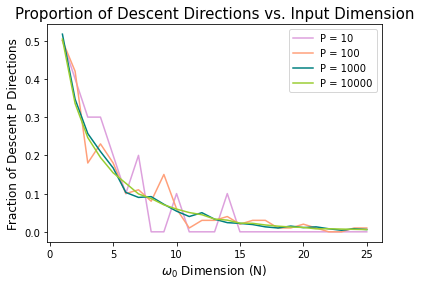

In [16]:
# Exctract keys and values to return a list of tuples for each P group 
P_10 = probabilities[10].items()
P_100 = probabilities[100].items()
P_1000 = probabilities[1000].items()
P_10000 = probabilities[10000].items()

# assign x values as the N dimension and y values as the fraction of descent directions at each of the 4 P groups
x1,y1 = zip(*P_10)
x2,y2 = zip(*P_100)
x3,y3 = zip(*P_1000)
x4,y4 = zip(*P_10000)

# plot x and y values for each of the 4 P groups

plt.plot(x1,y1, label = 'P = 10', color = 'plum')
plt.plot(x2,y2, label = 'P = 100', color = 'lightsalmon')
plt.plot(x3,y3, label = 'P = 1000', color = 'teal')
plt.plot(x4,y4, label = 'P = 10000', color = 'yellowgreen')

plt.title('Proportion of Descent Directions vs. Input Dimension', fontsize = 15)

plt.xlabel('$\omega_{0}$ Dimension (N)', fontsize = 12) 

plt.ylabel('Fraction of Descent P Directions', fontsize = 12) 

plt.legend()

plt.show()


#### How does the above plot demonstrate the curse of dimensionality?

Based on the above figure, the curse of dimensionality is demonstrated by the fact that the fraction of descent vectors decrease with increasing input dimension (N). It can be seen that with a lower number of generated directions (P = 10) the fraction of descent directions with increasing dimension fluctuates more rapidly (seen by the spikes throughout) compared to the higher P groups with more gradual decreases in fraction at larger dimensions. The overall shape of the plot indicates that for all groups of P, the fraction of descent directions converge to around 0% at the highest dimension of N = 25.  

# Exercise 3 – Coordinate Search and Coordinate Descent

### 3.1 – Creating the coordinate_search and coordinate_descent algorithm

In [3]:
# coordinate search function

def coordinate_search(g,alpha_choice,max_its,w): 
    '''

    coordinate_search is a zero-order local optimization function that avoids the inherent scaling issues of random search at higher dimensions. 
    The algorithm restricts the set of search directions to the coordinate axes determined by the input dimension N (look over 2N directions).
    2N basis vectors are randomly generated, scaled by alpha, and added to the current point to generate step candidates.
    Step candidates are evaluated in the function and the step that produces the smallest value is chosen and stored for the next iteration. 
    The algorithm is repeated a number of times determined by the assigned maximum iterations.
    Even though the lack of diversity of the coordinate axes may result in missing better descent directions, restricted search makes this algorithm far more scalable.


    Parameters
    -------------

    g : callable 
    cost function

    alpha_choice : int or str
    learning rate

    max_its : int
    maximum number of iterations

    w : array 
    starting vector


    Return
    -------------

    w_history : list
    contains all the steps taken in the algorithm including the starting point

    cost_history : list
    contains the evaluated cost function at the kth step including the starting value


    '''
    w_history = [w]         # container for w history containing initial point
    cost_history = [g(w)]           # container for corresponding cost function containing initial cost
    alpha = 0
    
    for k in range(1,max_its+1):
        if alpha_choice == 'diminishing': # check if diminishing steplength rule used
            alpha = 1/float(k) # step size becomes smaller for every step
        else:
            alpha = alpha_choice # step size remains the same 
        
        Basis_vector = np.zeros(len(w)) # generate/reset basis vector with the same dimension as our starting w vector
        direction = []
        for j in range(0,len(w)): # iterate N times to create our coordinate directions
            Basis_vector = np.zeros(len(w))
            Basis_vector[j] = 1     # replace 0 at jth index to 1 for our coordinate vector 
            direction.append(Basis_vector)
            direction.append(-Basis_vector) # include both the positive and negative values of the coordinate vector
        Basis_array = np.array(direction) # array of our basis vectors
        
        w_candidates = w + alpha*Basis_array # generate possible points using the basis vectors scaled by our step size   
        cost_candidates = np.array([g(w_vals) for w_vals in w_candidates]) # produces cost function ouputs from w_candidates
        min_dir = np.argmin(cost_candidates) # find index among the cost candidates that was the minimum
        
        if g(w_candidates[min_dir]) < (g(w)): # check if current evaluation is smaller than previous cost
            w = w_candidates[min_dir] # update new starting vector 
        w_history.append(w) # keep track of our points
        cost_history.append(g(w)) # keep track of our cost function
        
    return w_history,cost_history

In [4]:
# coordinate descent function

def coordinate_descent(g,alpha_choice,max_its,w): 
    '''

    coordinate_descent is a zero-order local optimization function that is more effective than coordinate search at the same computational cost. 
    The algorithm also restricts the set of search directions to the coordinate axes determined by the input dimension N (look over 2N directions).
    Instead of evaluating every coordinate direction and choosing the best descent, the directions are individually scaled by alpha, and added to the current point to generate step candidate.
    The first step candidate results in a descent is stored for the next iteration. 
    The algorithm is repeated a number of times determined by the assigned maximum iterations x N for a fair comparison between the two algorithms.
    Coordinate descent potentially minimizes the function much faster at the same computational cost.  


    Parameters
    -------------

    g : callable 
    cost function

    alpha_choice : int or str
    learning rate

    max_its : int
    maximum number of iterations

    w : array 
    starting vector


    Return
    -------------

    w_history : list
    contains all the steps taken in the algorithm including the starting point

    cost_history : list
    contains the evaluated cost function at the kth step including the starting value

    '''
    w_history = [w]         # container for w history containing initial point
    cost_history = [g(w)]           # container for corresponding cost function containing initial cost
    alpha = 0
    
    for k in range(1,(((max_its)*len(w))+1)): # take max_its x N steps for our max number of steps (for fair comparison to coordinate search)
        if alpha_choice == 'diminishing': # check if diminishing steplength rule used
            alpha = 1/float(k) # step size becomes smaller for every step
        else:
            alpha = alpha_choice # step size remains the same 
        
        Basis_vector = np.zeros(len(w)) # generate a basis vector with the same dimension as our starting w vector
        direction = []
        for j in range(0,len(w)):  # iterate through N input dimension to create our basis vectors 
            Basis_vector = np.zeros(len(w))
            Basis_vector[j] = 1   # replace 0 at jth index to 1 for our coordinate vector
            direction.append(Basis_vector)
            direction.append(-Basis_vector) # include both positive and negative values of our coordinate direction
        Basis_array = np.array(direction) # contains our basis vectors
        rand_Basis = np.random.permutation(Basis_array) # randomly shuffle the order of our basis vectors so we do not end up going in the same direction for all steps
        
        for i in rand_Basis: # go through each basis vector rather than evaluating all at once
            w_candidate = w + alpha*i # generate possible points using the basis vector scaled by our step size   
            cost_candidate = g(w_candidate)
            
            if cost_candidate < (g(w)): # check if current evaluation is smaller than previous cost
                w = w_candidate # update new starting vector
                break  # if our current basis vector is descending then choose, despite the posibility of a better descending direction
            
            else:
                continue # continue looking at other basis vectors in our basis array to find one that is descending
        
        w_history.append(w) # keep track of our points
        cost_history.append(g(w)) # keep track of our cost function
      
    return w_history,cost_history

### 3.2 – Comparison between coordinate_search and coordinate_descent

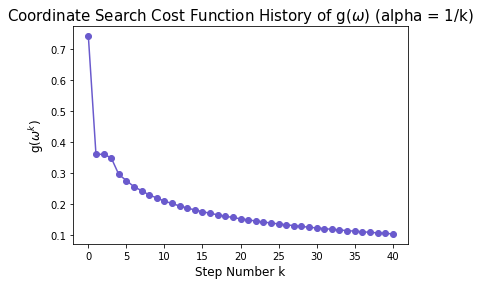

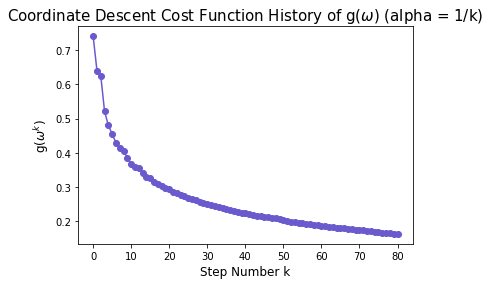

In [19]:
# Set the parameters for our algorithm 
g = lambda w: (0.26*(w[0]**2 + w[1]**2)) - 0.48*w[0]*w[1]
alpha_choice = 'diminishing'; w = np.array([3,4]); max_its = 40;


# Run our algorithm with the defined function to obtain w and cost history
w_history,cost_history = coordinate_search(g,alpha_choice,max_its,w)
w2_history,cost2_history = coordinate_descent(g,alpha_choice,max_its,w)


# Plot coordinate search 
step_numbers = np.arange(0, len(cost_history)) # create an array that is a range from 0 to the number of steps taken

plt.title("Coordinate Search Cost Function History of g($\omega$) (alpha = 1/k)", fontsize = 15) # set title of plot to cost history of coordinate search 

plt.xlabel('Step Number k', fontsize = 12) # set x-axis title to the kth step in the algorithm

plt.ylabel('g($\omega^k$)', fontsize = 12) # set y-axis title to the value of the cost function at the kth step

plt.plot(step_numbers, cost_history, color = 'slateblue', marker = 'o') # set the x and y axis values, color of plot, and shape of marker

plt.show()


# Plot coordinate descent 
step2_numbers = np.arange(0, len(cost2_history)) # create an array that is a range from 0 to the number of steps taken

plt.title("Coordinate Descent Cost Function History of g($\omega$) (alpha = 1/k)", fontsize = 15) # set title of plot to cost history of coordinate descent

plt.xlabel('Step Number k', fontsize = 12) # set x-axis title to the kth step in the algorithm

plt.ylabel('g($\omega^k$)', fontsize = 12) # set y-axis title to the value of the cost function at the kth step

plt.plot(step2_numbers, cost2_history, color = 'slateblue', marker = 'o') # set the x and y axis values, color of plot, and shape of marker

plt.show()

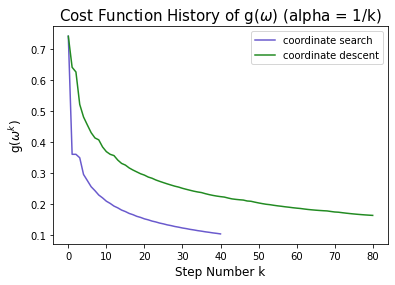

In [20]:
# Plot cost history plot for both coordinate search and coordinate descent to compare 

plt.title("Cost Function History of g($\omega$) (alpha = 1/k)", fontsize = 15) 

plt.xlabel('Step Number k', fontsize = 12)

plt.ylabel('g($\omega^k$)', fontsize = 12) 

plt.plot(step_numbers, cost_history, color = 'slateblue', label = 'coordinate search') # plot cost history of coordinate search

plt.plot(step2_numbers, cost2_history, color = 'forestgreen', label = 'coordinate descent') # plot cost history of coordinate descent

plt.legend(loc = 'upper right') # provide legend in the upper right quadrant to distinguish between the plots based on color and marker shape

plt.show()

#### Comparison between coordinate search and coordinate descent

Based on the plot above, it is possible for the coordinate descent to reach a lower cost function (g(wk)) than coordinate search because it is able to take more steps. Through much of the steps (from k = (1,60]) coordinate search resulted in a lower cost function but after later steps coordinate descent reached a lower cost function than coordinate search. At the end of the runs coordinate search produced g(w40) > 0.1 whereas coordinate descent produced g(w80) < 0.1. When running the algorithms again, coordinate descent produces different plots each time whereas coordinate search plot remained the same. This is due to the nature of the algorithms where coordinate search always chooses the largest descent among the 2N coordinates whereas coordinate descent chooses any descending direction among 2N coordinates. 

# Exercise 4 – Gradient Descent

### Importing Libraries

In [21]:
# import statement for autograd wrapped numpy
import autograd.numpy as np   
# import statment for gradient calculator
from autograd import grad  

### Gradient Descent Algorithm 

In [22]:
# gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w]           # container for weight history
    cost_history = [g(w)]          # container for corresponding cost function history
    for k in range(max_its):
        # evaluate the gradient, store current weights and cost function value
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return cost_history

### Testing Gradient Descent 

In [25]:
# Set the parameters for our algorithm 

# Run 1
g = lambda w: (1/50)*(w**4 + w**2 + 10*w)
alpha = 1; w = np.array([2]); max_its = 100;

# Run 2
g = lambda w: (1/50)*(w**4 + w**2 + 10*w)
alpha = 0.1; w = np.array([2]); max_its = 100;

# Run 3
g = lambda w: (1/50)*(w**4 + w**2 + 10*w)
alpha = 0.01; w = np.array([2]); max_its = 100;

# Run our algorithm with the defined function to obtain w and cost history
cost_history_run1 = gradient_descent(g,1,max_its,w)
cost_history_run2 = gradient_descent(g,0.1,max_its,w)
cost_history_run3 = gradient_descent(g,0.01,max_its,w)

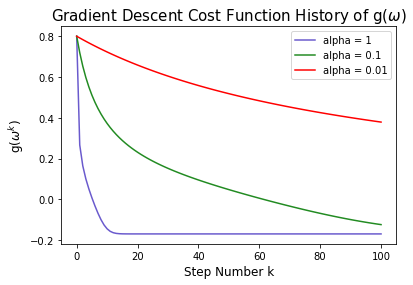

In [26]:
plt.title("Gradient Descent Cost Function History of g($\omega$)", fontsize = 15) 

plt.xlabel('Step Number k', fontsize = 12)

plt.ylabel('g($\omega^k$)', fontsize = 12)

step_numbers_r1, step_numbers_r2, step_numbers_r3 = np.arange(0, len(cost_history_run1)), np.arange(0, len(cost_history_run2)), np.arange(0, len(cost_history_run3))

plt.plot(step_numbers_r1, cost_history_run1, color = 'slateblue', label = 'alpha = 1') # plot cost history of alpha = 1

plt.plot(step_numbers_r2, cost_history_run2, color = 'forestgreen', label = 'alpha = 0.1') # plot cost history of alpha = 0.1

plt.plot(step_numbers_r3, cost_history_run3, color = 'red', label = 'alpha = 0.01') # plot cost history of alpha = 0.01

plt.legend(loc = 'upper right') # provide legend in the upper right quadrant to distinguish between the plots based on color and marker shape

plt.show()

#### Which step length works best?

Based on the above plot, the best alpha to choose based on the particular function and starting vector is alpha = 1. This is because after the 50th step it has the lowest cost function with g(w) < 0, whereas alpha = 0.1 and alpha = 0.01 result in g(w) > 0. Moreover, the rate of minimzation is best for alpha = 1 as it has the steepest slope indicating rapid minimization 